In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pylab as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Cleveland Dataset.csv')

In [3]:
 data.shape

(303, 14)

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# features cardinality 
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [7]:
# rename the features 
data = data.rename(columns = {'cp':'Chest pain type', 'trestbps':'Resting blood pressure', 'chol': 'Cholesterol','fbs': 'Fasting blood sugar', 
                              'restecg' : 'Rest electrocardiographic', 'thalach': 'Maximum heart rate', 'exang': 'Exercise induced angina','target':'Heart disease',
                              'oldpeak': 'ST depression', 'slope': 'ST slope', 'ca':'Number of major vessels', 'thal': 'Thallium heart scan'}, errors="raise")

In [8]:
# rename the lables
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['Chest pain type'][data['Chest pain type'] == 0] = 'typical'
data['Chest pain type'][data['Chest pain type'] == 1] = 'atypical'
data['Chest pain type'][data['Chest pain type'] == 2] = 'non-anginal'
data['Chest pain type'][data['Chest pain type'] == 3] = 'asymptomatic'

data['Fasting blood sugar'][data['Fasting blood sugar'] == 0] = 'lower than 120mg/ml'
data['Fasting blood sugar'][data['Fasting blood sugar'] == 1] = 'greater than 120mg/ml'

data['Rest electrocardiographic'][data['Rest electrocardiographic'] == 0] = 'normal'
data['Rest electrocardiographic'][data['Rest electrocardiographic'] == 1] = 'ST-T wave abnormality'
data['Rest electrocardiographic'][data['Rest electrocardiographic'] == 2] = 'left ventricular hypertrophy'

data['Exercise induced angina'][data['Exercise induced angina'] == 0] = 'no'
data['Exercise induced angina'][data['Exercise induced angina'] == 1] = 'yes'

data['ST slope'][data['ST slope'] == 0] = 'upsloping'
data['ST slope'][data['ST slope'] == 1] = 'flat'
data['ST slope'][data['ST slope'] == 2] = 'downsloping'

data['Thallium heart scan'][data['Thallium heart scan'] == 0] = 'unknown'
data['Thallium heart scan'][data['Thallium heart scan'] == 1] = 'fixed defect'
data['Thallium heart scan'][data['Thallium heart scan'] == 2] = 'normal'
data['Thallium heart scan'][data['Thallium heart scan'] == 3] = 'reversable defect'

data['Heart disease'][data['Heart disease'] == 0] = 'NO'
data['Heart disease'][data['Heart disease'] == 1] = 'Yes'

In [9]:
# Grouping Features by data type 
# numerical fearures 
numerical_features = ['age', 'Cholesterol', 'Resting blood pressure', 'Maximum heart rate','ST depression']

# categorical features
categorical_features = ['sex', 'Fasting blood sugar', 'Exercise induced angina','Number of major vessels','Chest pain type', 'Rest electrocardiographic', 'ST slope', 'Thallium heart scan', 'Heart disease']


In [10]:
# continuous features quality report
pd.set_option("display.float", "{:.2f}".format)
data[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.00,54.37,9.08,29.00,47.50,55.00,61.00,77.00
Cholesterol,303.00,246.26,51.83,126.00,211.00,240.00,274.50,564.00
Resting blood pressure,303.00,131.62,17.54,94.00,120.00,130.00,140.00,200.00
Maximum heart rate,303.00,149.65,22.91,71.00,133.50,153.00,166.00,202.00
ST depression,303.00,1.04,1.16,0.00,0.00,0.80,1.60,6.20


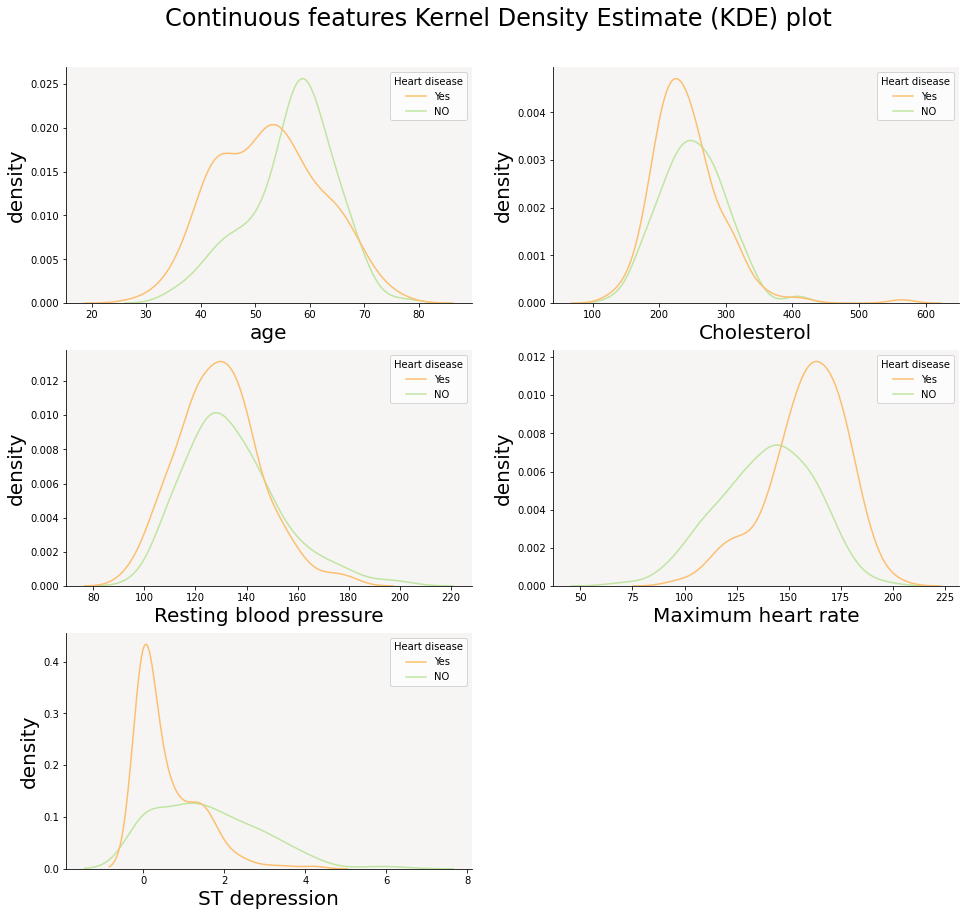

In [11]:
# visualizing continuous features distribution
L = len(numerical_features)
ncol= 2
nrow= int(np.ceil(L/ncol))
remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol, figsize=(16, 14))   
fig.subplots_adjust(top=0.92)
ax.flat[-remove_last].set_visible(False)

i = 1
for col in numerical_features:
    plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
    
    ax = sns.kdeplot(data=data, x=col, hue="Heart disease", palette='Spectral') 
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("density", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)
    
    i = i +1
plt.suptitle('Continuous features Kernel Density Estimate (KDE) plot' ,fontsize = 24);

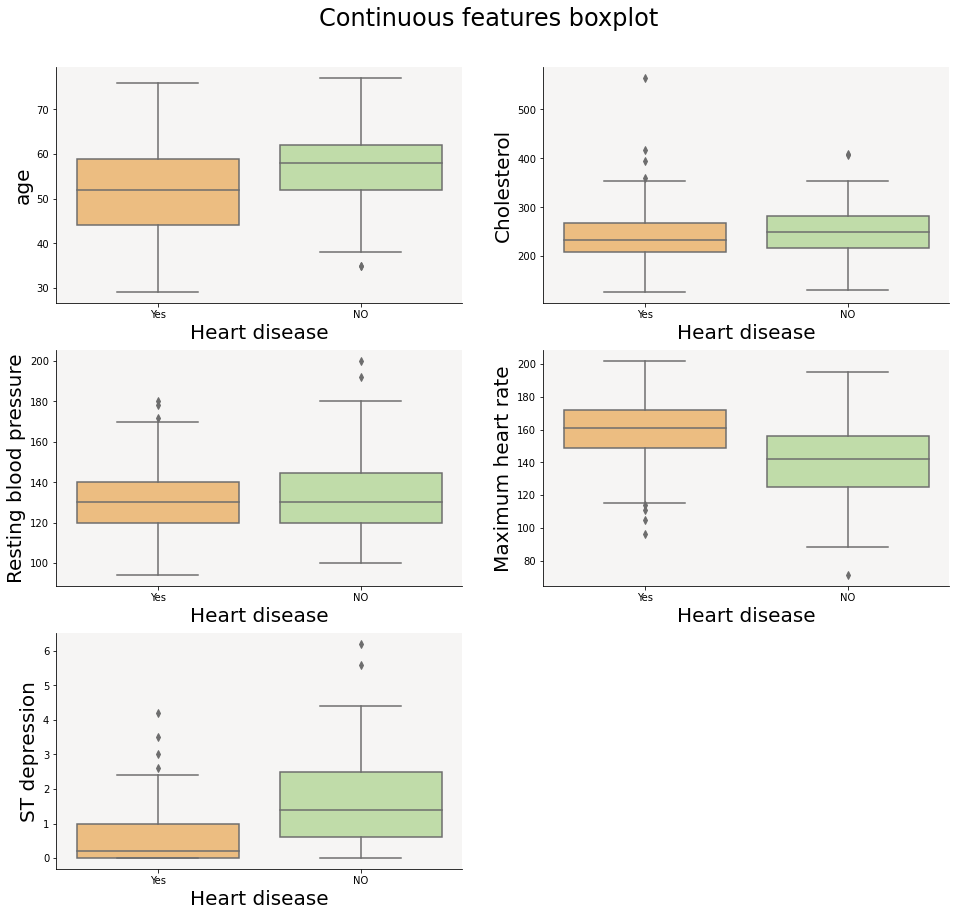

In [12]:
# continuous features boxplot
L = len(numerical_features)
ncol= 2
nrow= int(np.ceil(L/ncol))
remove_last= (nrow * ncol) - L

fig, ax = plt.subplots(nrow, ncol, figsize=(16, 14))   
fig.subplots_adjust(top=0.92)
ax.flat[-remove_last].set_visible(False)

i = 1
for col in numerical_features:
    plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
    
    ax = sns.boxplot(data=data, x=data['Heart disease'], y=col, palette='Spectral') 
    ax.set_xlabel('Heart disease', fontsize=20)
    ax.set_ylabel(col, fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)
    i = i +1
plt.suptitle('Continuous features boxplot' ,fontsize = 24);

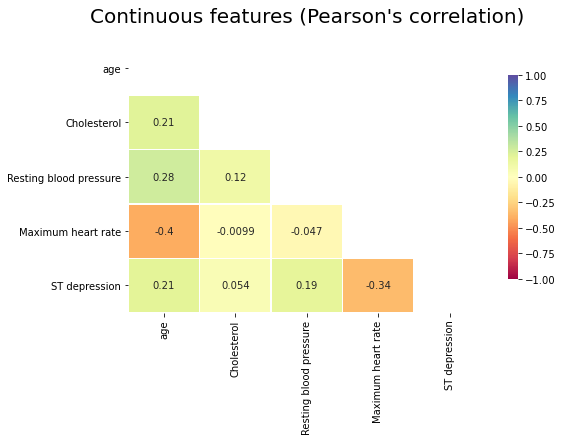

In [13]:
# pearson's correlation
num_df= data [numerical_features]
corr = num_df.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(palette='Spectral', as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Continuous features (Pearson's correlation)", fontsize=20, y= 1.05);

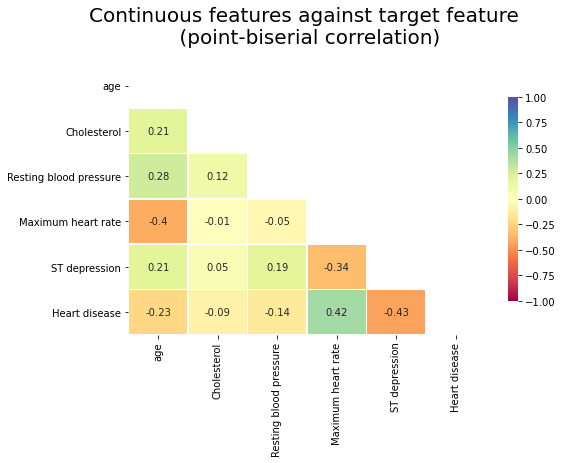

In [14]:
# point_biserial correlation
num_target= ['age', 'Cholesterol', 'Resting blood pressure', 'Maximum heart rate','ST depression', 'Heart disease']
data['Heart disease'][data['Heart disease'] == 'NO'] = 0
data['Heart disease'][data['Heart disease'] == 'Yes'] = 1

def point_biserial(x, y):
    pb = stats.pointbiserialr(x, y)
    return pb[0]

rows= []
for x in num_target:
    col = []
    for y in num_target :
        pbs =point_biserial(data[x], data[y]) 
        col.append(round(pbs,2))  
    rows.append(col)  
    
pbs_results = np.array(rows)
DF = pd.DataFrame(pbs_results, columns = data[num_target].columns, index =data[num_target].columns)

mask = np.triu(np.ones_like(DF, dtype=bool))
corr = DF.mask(mask)

f, ax = plt.subplots(figsize=(8, 5), facecolor=None)
cmap = sns.color_palette(palette='Spectral', as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1, center=0, annot=True,
            square=False, linewidths=.5, cbar_kws={"shrink": 0.75})
ax.set_title("Continuous features against target feature \n (point-biserial correlation)", fontsize=20, y= 1.05);

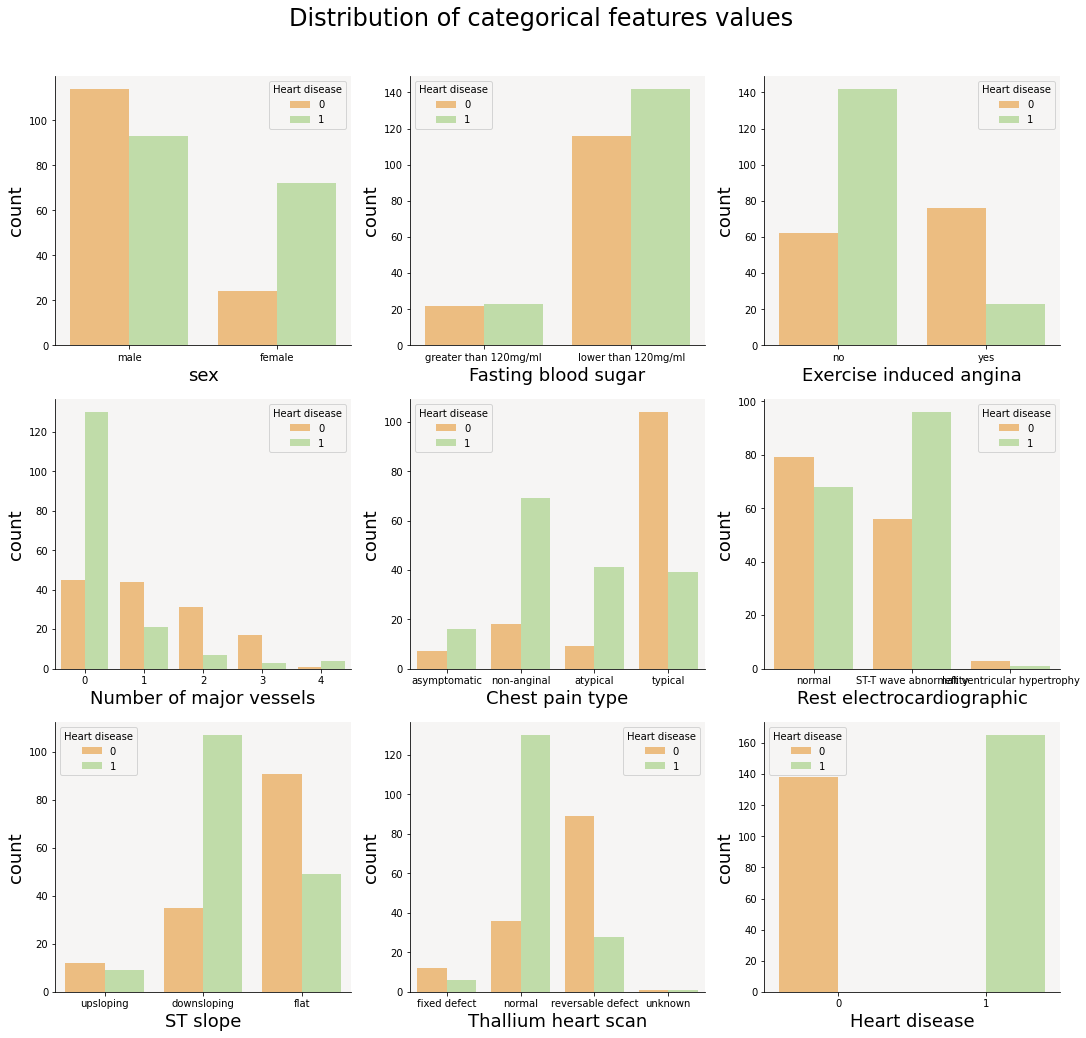

In [15]:
# visualizing categorical features 
def hist_plot(data, categorical_features):    
    L = len(categorical_features)
    ncol= 3
    nrow= int(np.ceil(L/ncol))
   
    fig, ax = plt.subplots(nrow, ncol,figsize=(18, 16))    
    fig.subplots_adjust(top=0.92)

    i = 1
    for col in categorical_features:
        plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
        g = sns.countplot(data=data, x=col, hue="Heart disease", palette='Spectral')
        g.set_xlabel(col, fontsize=18)
        g.set_ylabel("count", fontsize=18)
        sns.despine(right=True)
        sns.despine(offset=0, trim=False) 
        plt.legend(loc='best', title='Heart disease', facecolor='#F6F5F4')
        i = i +1

    plt.suptitle('Distribution of categorical features values' ,fontsize = 24)
    return 0

hist_plot(data, categorical_features);

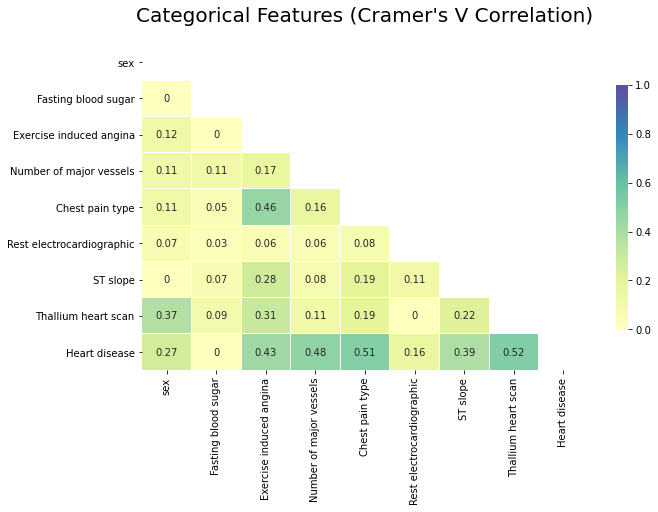

In [16]:
# cramer's v correlation 
def cramers_v(x, y): 
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

# calculate the correlation coefficients using the above function
rows= []
cat_df= data [categorical_features]
for x in cat_df:
    col = []
    for y in cat_df :
        cramers =cramers_v(cat_df[x], cat_df[y]) 
        col.append(round(cramers,2))
    rows.append(col)
    
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = cat_df.columns, index = cat_df.columns)

# plot the heat map
mask = np.triu(np.ones_like(df, dtype=bool))
corr = df.mask(mask)
f, ax = plt.subplots(figsize=(10, 6), facecolor=None)
cmap = sns.color_palette(palette='Spectral', as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=0, center=0, annot=True,
            square=False, linewidths=.01, cbar_kws={"shrink": 0.75})
ax.set_title("Categorical Features (Cramer's V Correlation)", fontsize=20, y= 1.05);